# tf.keras

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
batch_size = 32
epochs = 40
lr = 0.01
train_ratio = 0.9

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
x_, y_ = digits.data, digits.target

# min-max normalization
x_ = x_ / x_.max() 

# one hot encoding
y_one_hot = np.zeros((len(y_), 10))  
y_one_hot[np.arange(len(y_)), y_] = 1

In [4]:
a = np.zeros((5,5))
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [5]:
a[np.arange(1,3), 0] =1
a[2, np.arange(1,3)] =1
a

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_, 
                                                    y_one_hot, 
                                                    test_size=0.05, 
                                                    stratify=y_)

In [7]:
from tensorflow.keras.layers import Dense

In [8]:
model = tf.keras.Sequential()
model.add(Dense(25, activation='relu', input_shape=(64,)))
model.add(Dense(10, activation='softmax')) 

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 1,885
Trainable params: 1,885
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_split=1 - train_ratio)

Train on 1536 samples, validate on 171 samples
Epoch 1/40
1536/1536 [==============================] - 1s 818us/step - loss: 2.2739 - acc: 0.1556 - val_loss: 2.0840 - val_acc: 0.2281
Epoch 2/40
1536/1536 [==============================] - 0s 75us/step - loss: 1.9824 - acc: 0.3600 - val_loss: 1.8360 - val_acc: 0.4854
Epoch 3/40
1536/1536 [==============================] - 0s 66us/step - loss: 1.6967 - acc: 0.5938 - val_loss: 1.5291 - val_acc: 0.6550
Epoch 4/40
1536/1536 [==============================] - 0s 68us/step - loss: 1.3950 - acc: 0.7246 - val_loss: 1.2388 - val_acc: 0.7602
Epoch 5/40
1536/1536 [==============================] - 0s 70us/step - loss: 1.1336 - acc: 0.7891 - val_loss: 1.0306 - val_acc: 0.8187
Epoch 6/40
1536/1536 [==============================] - 0s 68us/step - loss: 0.9262 - acc: 0.8366 - val_loss: 0.8661 - val_acc: 0.8480
Epoch 7/40
1536/1536 [==============================] - 0s 67us/step - loss: 0.7674 - acc: 0.8698 - val_loss: 0.7323 - val_acc: 0.8596
Epoch 8

In [11]:
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']

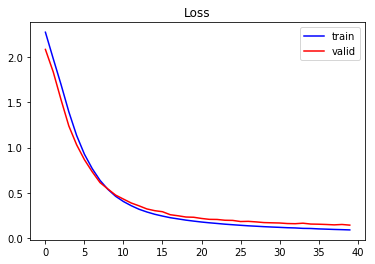

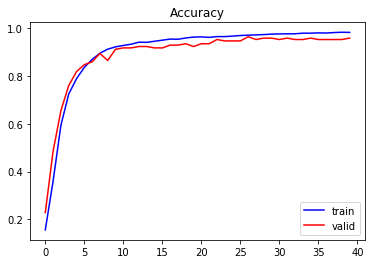

In [12]:
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
y_predict = model.predict_classes(x_test)
print(y_test[0])
y_test_label = np.argmax(y_test, axis=1)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

Accuracy in testing data: 0.9777777777777777


In [16]:
tf.global_variables()

[<tf.Variable 'dense/kernel:0' shape=(64, 25) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(25,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(25, 10) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32>,
 <tf.Variable 'Adam/iterations:0' shape=() dtype=int64>,
 <tf.Variable 'Adam/lr:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/beta_1:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/beta_2:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/decay:0' shape=() dtype=float32>,
 <tf.Variable 'training/Adam/Variable:0' shape=(64, 25) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_1:0' shape=(25,) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_2:0' shape=(25, 10) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_3:0' shape=(10,) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_4:0' shape=(64, 25) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_5:0' shape=(25,) dtype=float32>,
 <tf.Variable 'training/Adam/Variable_6:0' shape=(25,

In [17]:
# save model
model.save('my_model.h5')

# load model
another_model = tf.keras.models.load_model('my_model.h5')

In [18]:
y_predict = another_model.predict_classes(x_test)
y_test_label = np.argmax(y_test, axis=1)
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

Accuracy in testing data: 0.9777777777777777


# Practice
Build a cat-dog-classifier with tf.keras